In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
#initialize the values
N = 100
D = 1
dx = 1/N
w = 1.9
e = 10**(-5)
eta = 2
max_iter = (N*N)/2

In [61]:
def update_SOR(Y, w, seed):
    '''
    The SOR method grid update function
    Args:
        -Y, the grid at the current timestep
        -w, the omega constant
        -N, the size of the grid
    Out:
        -Y, the grid at the next timestep
    '''
    
    #update the grid at position i, j and take boundary conditions into account
    for j in range(1, len(Y)-1):
        for i in range(len(Y)):
            if i == 0:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,-1]) 
            elif i == N-1:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,0] + Y[j,i-1]) 
            else:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,i-1])  
            if Y[j,i]<0:
                Y[j,i] = 0
            for s in seed:
                Y[int(s[0]),int(s[1])] = 0
    return(Y)  

In [56]:
def init(N, seed):
    '''
    Initialize a grid with all zeros except on the first row where the value is all ones
    Args:
        -N the size of the grid
    Out: the initial state of the grid
    '''
    k = 1
    Y = np.zeros((N,N))
    Y[0] = np.ones(N)
    Y_prev = np.copy(Y)
    Y = update_SOR(Y, w, seed)
    #calculate the difference between the last two iterations
    diff = np.abs(Y - Y_prev)
    diff_val = (np.amax(diff))
    #until the differnce is smaller than epsilon, update the grid
    while(diff_val > e):
        k = k+1
        Y_prev = np.copy(Y)
        Y = update_SOR(Y, w, seed)
        diff = np.abs(Y - Y_prev)
        diff_val = (np.amax(diff))
    return Y


In [51]:
def neighbours_function2(new_s, Y, neighbours):
    x = 0
    y = 1
    if int(new_s[y]) == 0:
        if int(new_s[x]) ==0:
            if Y[int(new_s[y]),int(new_s[x])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])+1]])
            if Y[int(new_s[y]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),len(Y)-1]])
            if Y[int(new_s[y]-1),int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]+1),int(new_s[x])]])

        elif int(new_s[x]) == len(Y)-1:
            if Y[int(new_s[y]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),0]])
            if Y[int(new_s[y]),int(new_s[x])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])-1]])
            if Y[int(new_s[y]+1),int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]+1),int(new_s[x])]])

        else:
            if Y[int(new_s[y]),int(new_s[x])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])-1]])
            if Y[int(new_s[y]),int(new_s[x])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])+1]])
            if Y[int(new_s[y]),int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]+1),int(new_s[x])]])

    elif int(new_s[x]) == 0:
            if Y[int(new_s[y]),int(new_s[x])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])+1]])
            if Y[int(new_s[y]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),len(Y)-1]])
            if Y[int(new_s[y])+1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])+1,int(new_s[x])]])
            if Y[int(new_s[y])-1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])-1,int(new_s[x])]])

    elif int(new_s[x]) == len(Y)-1:
            if Y[int(new_s[y]),int(new_s[x])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])-1]])
            if Y[int(new_s[y]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),0]])
            if Y[int(new_s[y])-1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])-1,int(new_s[x])]])
            if Y[int(new_s[y])+1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])+1,int(new_s[x])]])
       
    else:
        print(new_s)
        for i in [-1,1]:
            if Y[int(new_s[x])+i,int(new_s[y])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]) ,int(new_s[x])+i ]])
            if Y[int(new_s[x]),int(new_s[y])+i]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])+i, int(new_s[x])]] )
    return neighbours


In [52]:
def neighbours_function(new_s, Y, neighbours):
    if int(new_s[0]) == 0:
        if int(new_s[1]) ==0:
            if Y[int(new_s[0]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
        elif int(new_s[1]) == len(Y)-1:
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])
            if Y[int(new_s[0]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),0]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])            
        else:
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
    elif int(new_s[1]) == 0:
        if Y[int(new_s[0]),len(Y)-1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
        if Y[int(new_s[0]),new_s[1]+1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),new_s[1]+1]])  
        if Y[int(new_s[0])-1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
        if Y[int(new_s[0])+1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
    elif int(new_s[1]) == len(Y)-1:
        if Y[int(new_s[0]),0]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),0]])
        if Y[int(new_s[0]),int(new_s[1])-1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
        if Y[int(new_s[0])-1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
        if Y[int(new_s[0])+1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])           
    else:
        for i in [-1,1]:
            if Y[int(new_s[0])+i,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+i,int(new_s[1])] ])
            if Y[int(new_s[0]),int(new_s[1])+i]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+i]] )
    return neighbours


In [53]:
def growth(Y, seed, neighbours, eta):
    total = 0
    prop = []
    for s in seed:
        Y[int(s[0]),int(s[1])] = 0

    for n in neighbours:
        total += abs((Y[int(n[0]),int(n[1])])**eta)
        c_ij = (Y[int(n[0]),int(n[1])])**eta
        prop.append(abs(c_ij))
    prop = prop/total
#     if total == 0:
#         print(stop)

#     test = Y<0

    index = random.choice(np.arange(len(neighbours)), p = prop)
    new_s = neighbours[index] 
    seed = np.vstack([seed, new_s])
    neighbours = np.delete(neighbours, index, axis = 0)
    neighbours =  neighbours_function(new_s, Y, neighbours)
    return Y, seed, neighbours


In [54]:
def itter(seed, Y, eta, max_iter, neighbours):
    for i in range(int(max_iter)):
        Y, seed, neighbours = growth(Y, seed, neighbours, eta)
        Y = update_SOR(Y, w, seed)
    seed_grid = np.zeros((N,N))
    
    for i in seed:
        seed_grid[int(i[0]), int(i[1])]=1
    plt.imshow(seed_grid)
    plt.show()
    plt.imshow(Y)
    plt.show()
# Zorg dat wanneer je seed het platfond raakt hij niet verder groeit, anders neem hij heel de bovenkant over 
# we hebben nog steeds een afwijking naar rechts 

In [64]:
N=100
seed = np.array([[N-1,round((N-1)/2)]])
grid = init(N, seed)

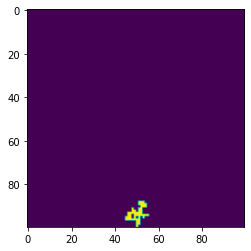

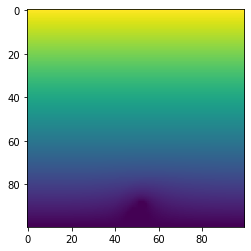

In [66]:
Y = np.copy(grid)
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
itter(seed, Y, 1, 50, neighbours)

B

In [13]:
def init_MC(N):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state of the grid
    '''
    grid = np.zeros((N,N))
    return grid
grid = init_MC(40)

In [17]:
def neighbours_MC(current_pos, grid, neighbours, seed):
    neighbour_candidates = np.array([seed[0]])
    for i in [-1, 1]:
        if current_pos[0] + i >0 or current_pos[0] + i < len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0]+i, current_pos[1]]])
        if current_pos[1]+i == len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], 0]])
        elif current_pos[1]+i == -1:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], len(grid)-1]])
        else:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], current_pos[1]+i]])
    clear = True
    for n in neighbour_candidates:
        for s in seed:
            if (n==s).all():
                clear = False
        for ne in neighbours:
            if (n==ne).all():
                clear = False
        if clear == True:
            neighbours = np.vstack([neighbours, n])
        else:
            clear = True
    return neighbours


In [19]:
seed = np.array([[N-1,round((N-1)/2)]])
neighbours= np.array([[round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])

neighbours_MC([N-2, round((N-1)/2)], grid, neighbours, seed)

array([[99, 49],
       [99, 51],
       [97, 50],
       [98, 49],
       [98, 51]])

In [45]:
def random_walker(grid, seed, neighbours, max_iter):
    current_pos = [0, random.randint(0, len(grid)-1)]
    #current_pos = [0, seed[0, 1]]
    for i in range(max_iter):
        move_dir = random.randint(0, 4)
        if move_dir == 0:
            new_pos = [current_pos[0]-1, current_pos[1]]
        elif move_dir == 1:
            new_pos = [current_pos[0]+1, current_pos[1]]
        elif move_dir == 2:
            new_pos = [current_pos[0], current_pos[1]+1]
        elif move_dir == 3:
            new_pos = [current_pos[0], current_pos[1]-1]
        if new_pos[0] < 0 or new_pos[0] >= len(grid):
            current_pos = [0, random.randint(0, len(grid)-1)]
        elif new_pos[1] < 0:
            current_pos = [new_pos[0], len(grid)-1]
        elif new_pos[1] >= len(grid):
            current_pos = [new_pos[0], 0]
        else:
            current_pos = new_pos
        delete_index = -1
        for j in range(len(neighbours)):
            new_neighbours = neighbours
            if (neighbours[j] == current_pos).all():
                #print(True)
                delete_index = j
                break
        if(delete_index >=0):
            seed = np.vstack([seed, neighbours[delete_index]])
            grid[neighbours[delete_index, 0], neighbours[delete_index, 1]] = 1
            #print(seed)
            #print(delete_index)
            neighbours = np.delete(neighbours, delete_index, axis = 0)
            #print(neighbours)
            neighbours = neighbours_MC(current_pos, grid, neighbours, seed)
            #print(neighbours)
            current_pos = [0, random.randint(0, len(grid)-1)]
    return(grid)

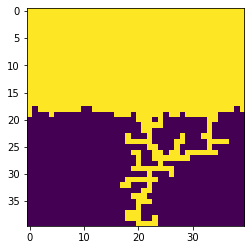

In [47]:
N=40
Y = np.copy(grid)
seed = np.array([[N-1,round((N-1)/2)]])
Y[seed[0, 0],seed[0, 1]] = 1
# plt.imshow(Y)
# plt.show()
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
Y = random_walker(Y, seed, neighbours, 500000)
plt.imshow(Y)
plt.show()

In [ ]:
#     if int(new_s[0]) == 0:
#         if int(new_s[1]) ==0:
#             if Y[int(new_s[0]),len(Y)-1]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
#             if Y[int(new_s[0]),int(new_s[1])+1]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])  
#             if Y[int(new_s[0])+1,int(new_s[1])]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
#         elif int(new_s[1]) == len(Y)-1:
#             if Y[int(new_s[0]),int(new_s[1])-1]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])
#             if Y[int(new_s[0]),0]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0]),0]])  
#             if Y[int(new_s[0])+1,int(new_s[1])]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])            
#         else:
#             if Y[int(new_s[0]),int(new_s[1])+1]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])
#             if Y[int(new_s[0]),int(new_s[1])-1]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
#             if Y[int(new_s[0])+1,int(new_s[1])]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
#     elif int(new_s[1]) == 0:
#         if Y[int(new_s[0]),len(Y)-1]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
#         if Y[int(new_s[0]),new_s[1]+1]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0]),new_s[1]+1]])  
#         if Y[int(new_s[0])-1,int(new_s[1])]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
#         if Y[int(new_s[0])+1,int(new_s[1])]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
#     elif int(new_s[1]) == len(Y)-1:
#         if Y[int(new_s[0]),0]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0]),0]])
#         if Y[int(new_s[0]),int(new_s[1])-1]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
#         if Y[int(new_s[0])-1,int(new_s[1])]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
#         if Y[int(new_s[0])+1,int(new_s[1])]!=0:
#             neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])           
#     else:
#         for i in [-1,1]:
#             if Y[int(new_s[0])+i,int(new_s[1])]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0])+i,int(new_s[1])] ])
#             if Y[int(new_s[0]),int(new_s[1])+i]!=0:
#                 neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+i]] )